## A Comparison of the Using Entropy and Gini Impurity

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def entropy(y):
    """Return the entropy of the array y.
    
    Parameters
    ----------
    y: 1d numpy array
    
    Returns
    -------
    float
    """
    total_samples = y.shape[0]
    summation = 0
    
    for class_i in np.unique(y):
        prob = np.mean(y == class_i)
        summation += prob * np.log2(prob)
    
    return -summation

def gini(y):
    """Return the entropy of the array y.
    
    Parameters
    ----------
    y: 1d numpy array
    
    Returns
    -------
    float
    """
    total_samples = y.shape[0]
    summation = 0
    
    for class_i in np.unique(y):
        prob = np.mean(y == class_i)
        summation += prob**2
    
    return 1 - summation

def make_targets(*args):
    """Return an array of sequential integers, each repeated as many times
    as the corresponding element of count
    
    Parameters
    ----------
    args: integers 
    
    Returns
    -------
    1d numpy array
    """
    return np.concatenate([np.ones(count) * i for i, count in enumerate(args)])

def weighted_impurity(left, right, function):
    """Return the information gain of making the given split.
    
    Parameters
    ----------
    left: 1d numpy array of target values of the left split
    right: 1d numpy array of target values of the right split
    function: impurity function consuming array of target values
    
    Returns
    -------
    float
    """
    impurity = function(left) * len(left) + function(right) * len(right)
    impurity /= len(left) + len(right)
    return impurity

In [17]:
def impurity_loss(left, right, function):
    original = np.concatenate([left, right])
    p_left = len(left) / (len(left) + len(right))
    p_right = 1 - p_left
    return function(original) - p_left*function(left) - p_right*function(right)

To calculate the entropy of a split in which the left side gets 20 0's and 5 1's, and the right gets 30 0's and 45 1's, do:

In [18]:
impurity_loss(make_targets(20, 5),
              make_targets(30,45),
              entropy)

0.0913050304371581

In [49]:
count = 10
left, right = np.meshgrid(np.arange(0, count+1), np.arange(0, count+1))

In [55]:
loss_entropy = np.zeros((count+1, count+1))
loss_gini = np.zeros((count+1, count+1))

for i in range(count+1):
    for j in range(count+1):
        loss_entropy[i, j] = impurity_loss(make_targets(i, count-i),
                                           make_targets(j, count-j),
                                           entropy)
        loss_gini[i, j] = impurity_loss(make_targets(i, count-i),
                                           make_targets(j, count-j),
                                           gini)

Text(0, 0.5, 'right')

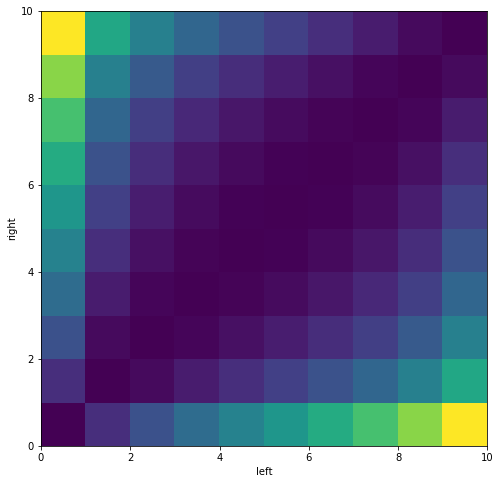

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
ax.pcolormesh(left, right, loss_entropy - loss_gini)
ax.set_xlabel("left")
ax.set_ylabel("right")